In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('artifacts/Tweets.csv') 

In [3]:
data.head() 

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


## Data Preprocessing


In [4]:
data.shape 

(14640, 15)

In [5]:
data.duplicated().sum() 

36

In [6]:
data.shape 

(14640, 15)

In [7]:
data.drop_duplicates(inplace=True) 


In [8]:
data.shape 

(14604, 15)

In [9]:
data.isnull().sum() 

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5445
negativereason_confidence        4101
airline                             0
airline_sentiment_gold          14564
name                                0
negativereason_gold             14572
retweet_count                       0
text                                0
tweet_coord                     13589
tweet_created                       0
tweet_location                   4723
user_timezone                    4814
dtype: int64

In [10]:
data.shape 

(14604, 15)

In [11]:
# Assuming 'data' is your DataFrame with the mentioned columns
# data = pd.read_csv('file_path.csv')

columns_to_remove = [
    'airline_sentiment_gold', 'name', 'negativereason_gold',
    'retweet_count', 'tweet_coord', 'tweet_created',
    'tweet_location', 'user_timezone'
]

# Drop specified columns
data.drop(columns=columns_to_remove, inplace=True)

# Now 'data' contains the DataFrame without the specified columns 


In [12]:
data.shape 

(14604, 7)

In [13]:
# Assuming 'data' is your DataFrame with the mentioned columns
# data = pd.read_csv('file_path.csv')

columns_to_remove = ['negativereason_confidence', 'tweet_id','airline']

# Drop specified columns
data.drop(columns=columns_to_remove, inplace=True)

# Now 'data' contains the DataFrame without the specified columns 


In [14]:
data.shape 

(14604, 4)

## Text Preprocessing

In [15]:
import re
import string 

Uppercase to Lowercase

In [16]:
data["text"] = data["text"].apply(lambda x: " ".join(x.lower() for x in x.split())) 

In [17]:
data.head() 

,airline_sentiment,airline_sentiment_confidence,negativereason,text
0,neutral,1.0000,NaN,@virginamerica what @dhepburn said.
1,positive,0.3486,NaN,@virginamerica plus you've added commercials t...
2,neutral,0.6837,NaN,@virginamerica i didn't today... must mean i n...
3,negative,1.0000,Bad Flight,@virginamerica it's really aggressive to blast...
4,negative,1.0000,Can't Tell,@virginamerica and it's a really big bad thing...


In [18]:
# Assuming 'data' is your DataFrame and 'airline_sentiment' column needs conversion
data['airline_sentiment'] = data['airline_sentiment'].replace({'negative': 1, 'positive': 0, 'neutral': 0})


In [19]:
data.shape 

(14604, 4)

Remove Links

In [20]:
df = pd.DataFrame(data)

columns_to_remove = [
    'airline_sentiment_gold', 'name', 'negativereason_gold',
    'retweet_count', 'tweet_coord', 'tweet_created',
    'tweet_location', 'user_timezone'
]


columns_exist = [col for col in columns_to_remove if col in df.columns]

if columns_exist:
    df.drop(columns=columns_exist, inplace=True) 


In [21]:
data.shape 

(14604, 4)

Remove Links

In [22]:
data["text"] = data["text"].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*','',x, flags=re.MULTILINE) for x in x.split())) 
                                                           

In [23]:
!pip install emoji 

Remove Punctuations

In [24]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
data["text"] = data["text"].apply(remove_punctuations) 



In [25]:
data.head(10) 

,airline_sentiment,airline_sentiment_confidence,negativereason,text
0,0,1.0000,NaN,virginamerica what dhepburn said
1,0,0.3486,NaN,virginamerica plus youve added commercials to ...
2,0,0.6837,NaN,virginamerica i didnt today must mean i need t...
3,1,1.0000,Bad Flight,virginamerica its really aggressive to blast o...
4,1,1.0000,Can't Tell,virginamerica and its a really big bad thing a...
5,1,1.0000,Can't Tell,virginamerica seriously would pay 30 a flight ...
6,0,0.6745,NaN,virginamerica yes nearly every time i fly vx t...
7,0,0.6340,NaN,virginamerica really missed a prime opportunit...
8,0,0.6559,NaN,virginamerica well i didnt…but now i do d
9,0,1.0000,NaN,virginamerica it was amazing and arrived an ho...


Remove Numbers

In [26]:
data["text"] = data['text'].str.replace(r'\d+', '', regex=True) 


In [27]:
data.head(10) 

,airline_sentiment,airline_sentiment_confidence,negativereason,text
0,0,1.0000,NaN,virginamerica what dhepburn said
1,0,0.3486,NaN,virginamerica plus youve added commercials to ...
2,0,0.6837,NaN,virginamerica i didnt today must mean i need t...
3,1,1.0000,Bad Flight,virginamerica its really aggressive to blast o...
4,1,1.0000,Can't Tell,virginamerica and its a really big bad thing a...
5,1,1.0000,Can't Tell,virginamerica seriously would pay a flight fo...
6,0,0.6745,NaN,virginamerica yes nearly every time i fly vx t...
7,0,0.6340,NaN,virginamerica really missed a prime opportunit...
8,0,0.6559,NaN,virginamerica well i didnt…but now i do d
9,0,1.0000,NaN,virginamerica it was amazing and arrived an ho...


In [28]:
!pip install emoji 



Remove stopwords

In [29]:
import nltk 

In [30]:
with open('static/model/corpora/stopwords/english','r') as file:
    sw = file.read().splitlines() 


In [31]:
sw 

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [32]:
data["text"] = data["text"].apply(lambda x: " ".join(x for x in x.split() if x not in sw)) 


In [33]:
data["text"].head() 

0                          virginamerica dhepburn said
1    virginamerica plus youve added commercials exp...
2    virginamerica didnt today must mean need take ...
3    virginamerica really aggressive blast obnoxiou...
4                   virginamerica really big bad thing
Name: text, dtype: object

Stemming

In [34]:
from nltk.stem import PorterStemmer
ps = PorterStemmer() 


In [35]:
data["text"] = data["text"].apply(lambda x: " ".join(ps.stem(x) for x in x.split())) 

In [36]:
data["text"].head() 

0                          virginamerica dhepburn said
1      virginamerica plu youv ad commerci experi tacki
2    virginamerica didnt today must mean need take ...
3    virginamerica realli aggress blast obnoxi ente...
4                   virginamerica realli big bad thing
Name: text, dtype: object

In [37]:
data 

,airline_sentiment,airline_sentiment_confidence,negativereason,text
0,0,1.0000,NaN,virginamerica dhepburn said
1,0,0.3486,NaN,virginamerica plu youv ad commerci experi tacki
2,0,0.6837,NaN,virginamerica didnt today must mean need take ...
3,1,1.0000,Bad Flight,virginamerica realli aggress blast obnoxi ente...
4,1,1.0000,Can't Tell,virginamerica realli big bad thing
...,...,...,...,...
14635,0,0.3487,NaN,americanair thank got differ flight chicago
14636,1,1.0000,Customer Service Issue,americanair leav minut late flight warn commun...
14637,0,1.0000,NaN,americanair pleas bring american airlin blackb...
14638,1,1.0000,Customer Service Issue,americanair money chang flight dont answer pho...


In [38]:
data['negativereason'] = data['negativereason'].apply(lambda x: " ".join(x.lower() for x in str(x).split()) if pd.notnull(x) else np.nan) 

In [39]:
data 

,airline_sentiment,airline_sentiment_confidence,negativereason,text
0,0,1.0000,NaN,virginamerica dhepburn said
1,0,0.3486,NaN,virginamerica plu youv ad commerci experi tacki
2,0,0.6837,NaN,virginamerica didnt today must mean need take ...
3,1,1.0000,bad flight,virginamerica realli aggress blast obnoxi ente...
4,1,1.0000,can't tell,virginamerica realli big bad thing
...,...,...,...,...
14635,0,0.3487,NaN,americanair thank got differ flight chicago
14636,1,1.0000,customer service issue,americanair leav minut late flight warn commun...
14637,0,1.0000,NaN,americanair pleas bring american airlin blackb...
14638,1,1.0000,customer service issue,americanair money chang flight dont answer pho...


In [40]:
def remove_punctuations(text):
    if isinstance(text, str):  # Check if the value is a string
        for punctuation in string.punctuation:
            text = text.replace(punctuation, '')
    return text 

In [41]:
data["negativereason"] = data["negativereason"].apply(remove_punctuations) 


In [42]:
data

,airline_sentiment,airline_sentiment_confidence,negativereason,text
0,0,1.0000,NaN,virginamerica dhepburn said
1,0,0.3486,NaN,virginamerica plu youv ad commerci experi tacki
2,0,0.6837,NaN,virginamerica didnt today must mean need take ...
3,1,1.0000,bad flight,virginamerica realli aggress blast obnoxi ente...
4,1,1.0000,cant tell,virginamerica realli big bad thing
...,...,...,...,...
14635,0,0.3487,NaN,americanair thank got differ flight chicago
14636,1,1.0000,customer service issue,americanair leav minut late flight warn commun...
14637,0,1.0000,NaN,americanair pleas bring american airlin blackb...
14638,1,1.0000,customer service issue,americanair money chang flight dont answer pho...


## Building Vacabulary

In [43]:
from collections import Counter

vocab = Counter() 


In [44]:
vocab 

Counter()

In [45]:
for sentence in data['text']:
    vocab.update(sentence.split()) 

In [46]:
vocab

Counter({'flight': 4793,
         'unit': 4126,
         'usairway': 3040,
         'americanair': 2903,
         'southwestair': 2445,
         'jetblu': 2285,
         'thank': 1681,
         'get': 1616,
         'hour': 1148,
         'cancel': 1050,
         'help': 1037,
         'servic': 987,
         'delay': 975,
         'time': 957,
         'custom': 933,
         'call': 766,
         'bag': 753,
         'wait': 744,
         'im': 738,
         'plane': 716,
         'us': 705,
         'fli': 688,
         'need': 683,
         'hold': 678,
         'amp': 640,
         'go': 631,
         'tri': 582,
         'one': 576,
         'cant': 574,
         'still': 571,
         'day': 558,
         'pleas': 557,
         'airlin': 553,
         'would': 547,
         'gate': 538,
         'back': 524,
         'virginamerica': 517,
         'flightl': 516,
         'seat': 513,
         'book': 498,
         'dont': 489,
         'make': 479,
         'chang': 462,
      

In [47]:
len(vocab) 

11004

In [48]:
data.shape

(14604, 4)

In [49]:
tokens = [key for key in vocab if vocab[key] > 30] 


In [50]:
tokens 

['virginamerica',
 'said',
 'plu',
 'youv',
 'ad',
 'experi',
 'didnt',
 'today',
 'must',
 'mean',
 'need',
 'take',
 'anoth',
 'trip',
 'realli',
 'entertain',
 'amp',
 'littl',
 'big',
 'bad',
 'thing',
 'serious',
 'would',
 'pay',
 'flight',
 'seat',
 'fli',
 'ye',
 'everi',
 'time',
 'go',
 'away',
 'miss',
 'without',
 'well',
 'amaz',
 'arriv',
 'hour',
 'earli',
 'your',
 'good',
 'know',
 'second',
 'caus',
 'pretti',
 'much',
 'better',
 'great',
 'deal',
 'alreadi',
 'think',
 'nd',
 'havent',
 'even',
 'st',
 'yet',
 'im',
 'u',
 'travel',
 'thank',
 'schedul',
 'still',
 'first',
 'cross',
 'countri',
 'lax',
 'mco',
 'ive',
 'heard',
 'noth',
 'flew',
 'nyc',
 'sfo',
 'last',
 'week',
 'couldnt',
 'sit',
 'due',
 'two',
 'either',
 'help',
 'awesom',
 'pleas',
 'want',
 'fare',
 'may',
 'three',
 'avail',
 'select',
 'love',
 'feel',
 'make',
 'stop',
 'soon',
 'guy',
 'mess',
 'reserv',
 'friend',
 'gave',
 'free',
 'statu',
 'call',
 'email',
 'respons',
 'happen',
 'u

In [51]:
len(tokens) 

710

In [52]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, 'static/model/vocabulary.txt') 


### Divide dataset

In [53]:
data

,airline_sentiment,airline_sentiment_confidence,negativereason,text
0,0,1.0000,NaN,virginamerica dhepburn said
1,0,0.3486,NaN,virginamerica plu youv ad commerci experi tacki
2,0,0.6837,NaN,virginamerica didnt today must mean need take ...
3,1,1.0000,bad flight,virginamerica realli aggress blast obnoxi ente...
4,1,1.0000,cant tell,virginamerica realli big bad thing
...,...,...,...,...
14635,0,0.3487,NaN,americanair thank got differ flight chicago
14636,1,1.0000,customer service issue,americanair leav minut late flight warn commun...
14637,0,1.0000,NaN,americanair pleas bring american airlin blackb...
14638,1,1.0000,customer service issue,americanair money chang flight dont answer pho...


In [54]:
columns_to_remove = [
    'negativereason'
]

data.drop(columns=columns_to_remove, inplace=True) 


In [55]:
data.shape 

(14604, 3)

In [56]:
data 

,airline_sentiment,airline_sentiment_confidence,text
0,0,1.0000,virginamerica dhepburn said
1,0,0.3486,virginamerica plu youv ad commerci experi tacki
2,0,0.6837,virginamerica didnt today must mean need take ...
3,1,1.0000,virginamerica realli aggress blast obnoxi ente...
4,1,1.0000,virginamerica realli big bad thing
...,...,...,...
14635,0,0.3487,americanair thank got differ flight chicago
14636,1,1.0000,americanair leav minut late flight warn commun...
14637,0,1.0000,americanair pleas bring american airlin blackb...
14638,1,1.0000,americanair money chang flight dont answer pho...


In [57]:
x = data['text'] 
y = data['airline_sentiment'] 

In [58]:
!pip install scikit-learn 

In [59]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [60]:
!python -m pip install --upgrade pip



In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) 


In [62]:
x_train.shape 

(11683,)

In [63]:
x_test.shape 

(2921,)

In [64]:
y_test 

3849     1
9788     1
11433    1
1382     0
10204    0
        ..
5146     0
13423    1
3647     0
8957     0
6787     1
Name: airline_sentiment, Length: 2921, dtype: int64

In [65]:
y_train 

508      0
439      0
1065     1
13837    0
11384    0
        ..
14200    1
5242     0
13886    1
2217     1
1303     1
Name: airline_sentiment, Length: 11683, dtype: int64

In [66]:
x_test 

3849     unit jh go process refund wifi ask receipt nev...
9788     usairway flight pleas get us flight plan alrea...
11433    usairway hope thank help travel halfway across...
1382                                unit wanna grand staff
10204                            usairway mani thank repli
                               ...                        
5146     southwestair love southwest accept flight atte...
13423    americanair thank done dont understand whose b...
3647                     unit happen flight statu map cool
8957     jetblu ceo weigh profit flyer chronicleherald ...
6787     jetblu issu websit log app know enter info cor...
Name: text, Length: 2921, dtype: object

In [67]:
x_train 

508                        unit thank fill how luck common
439      virginamerica love take southwestair backyard ...
1065     unit pt u cancel flight final got stndbi pm fl...
13837    americanair look statu flight schedul tomorrow...
11384    usairway thank betti work gate ilm love gate a...
                               ...                        
14200                      americanair idea what flight aa
5242     southwestair wanna say your incred send peopl ...
13886    americanair im get call call seem drop instant...
2217     unit amp final told couldnt use front plane re...
1303     unit need retrain flight attend say room carri...
Name: text, Length: 11683, dtype: object

## Vectorization

In [68]:
def vectorizer(ds, vocabulary):
    vectorized_1st = []

    for sentence in ds:
        sentence_1st = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_1st[i] = 1
                
        vectorized_1st.append(sentence_1st)
    vectorized_1st_new = np.asarray(vectorized_1st, dtype=np.float32)

    return vectorized_1st_new 

In [69]:
vectorized_x_train = vectorizer(x_train, tokens) 

In [70]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [71]:
for i in vectorized_x_train[0]:
    print(i) 

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [72]:
vectorized_x_test = vectorizer(x_test, tokens) 

In [73]:
vectorized_x_test 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [74]:
for i in vectorized_x_test[0]:
    print(i) 

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [75]:
y_train

508      0
439      0
1065     1
13837    0
11384    0
        ..
14200    1
5242     0
13886    1
2217     1
1303     1
Name: airline_sentiment, Length: 11683, dtype: int64

In [76]:
y_test 

3849     1
9788     1
11433    1
1382     0
10204    0
        ..
5146     0
13423    1
3647     0
8957     0
6787     1
Name: airline_sentiment, Length: 2921, dtype: int64

In [77]:
y_test.shape

(2921,)

In [78]:
y_train.shape

(11683,)

In [79]:
data

,airline_sentiment,airline_sentiment_confidence,text
0,0,1.0000,virginamerica dhepburn said
1,0,0.3486,virginamerica plu youv ad commerci experi tacki
2,0,0.6837,virginamerica didnt today must mean need take ...
3,1,1.0000,virginamerica realli aggress blast obnoxi ente...
4,1,1.0000,virginamerica realli big bad thing
...,...,...,...
14635,0,0.3487,americanair thank got differ flight chicago
14636,1,1.0000,americanair leav minut late flight warn commun...
14637,0,1.0000,americanair pleas bring american airlin blackb...
14638,1,1.0000,americanair money chang flight dont answer pho...


In [80]:
data

,airline_sentiment,airline_sentiment_confidence,text
0,0,1.0000,virginamerica dhepburn said
1,0,0.3486,virginamerica plu youv ad commerci experi tacki
2,0,0.6837,virginamerica didnt today must mean need take ...
3,1,1.0000,virginamerica realli aggress blast obnoxi ente...
4,1,1.0000,virginamerica realli big bad thing
...,...,...,...
14635,0,0.3487,americanair thank got differ flight chicago
14636,1,1.0000,americanair leav minut late flight warn commun...
14637,0,1.0000,americanair pleas bring american airlin blackb...
14638,1,1.0000,americanair money chang flight dont answer pho...


In [81]:
data.drop(columns=['airline_sentiment_confidence'], inplace=True)



In [82]:
data

,airline_sentiment,text
0,0,virginamerica dhepburn said
1,0,virginamerica plu youv ad commerci experi tacki
2,0,virginamerica didnt today must mean need take ...
3,1,virginamerica realli aggress blast obnoxi ente...
4,1,virginamerica realli big bad thing
...,...,...
14635,0,americanair thank got differ flight chicago
14636,1,americanair leav minut late flight warn commun...
14637,0,americanair pleas bring american airlin blackb...
14638,1,americanair money chang flight dont answer pho...


In [83]:
data.shape

(14604, 2)

In [84]:
y_train.value_counts()

airline_sentiment
1    7325
0    4358
Name: count, dtype: int64

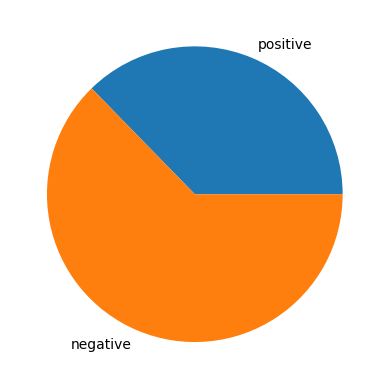

In [85]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['positive', 'negative']) 
plt.show() 

## Handle imbalnced dataset

In [86]:
!pip install imbalanced-learn 

In [87]:
from imblearn.over_sampling import SMOTE
smote = SMOTE() 
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape) 

(14650, 710) (14650,)


In [88]:
y_train_smote.value_counts() 

airline_sentiment
0    7325
1    7325
Name: count, dtype: int64

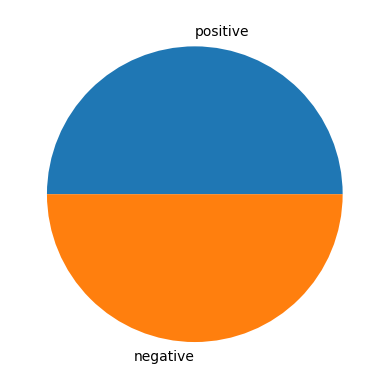

In [89]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['positive', 'negative']) 
plt.show() 

## Model Training & Evaluation

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [91]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr  = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1  = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}') 
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}') 
    

## Logistic Regression

In [92]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote,y_train_smote) 

y_train_pred = lr.predict(vectorized_x_train_smote) 

y_test_pred = lr.predict(vectorized_x_test) 

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred) 


Training Scores:
	Accuracy = 0.864
	Precision = 0.882
	Recall = 0.84
	F1-Score = 0.861
Testing Scores:
	Accuracy = 0.811
	Precision = 0.868
	Recall = 0.824
	F1-Score = 0.846


## Multinominal Naive Bayes

In [93]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote,y_train_smote) 

y_train_pred = mnb.predict(vectorized_x_train_smote) 

y_test_pred = mnb.predict(vectorized_x_test) 

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred) 

Training Scores:
	Accuracy = 0.83
	Precision = 0.832
	Recall = 0.828
	F1-Score = 0.83
Testing Scores:
	Accuracy = 0.795
	Precision = 0.859
	Recall = 0.805
	F1-Score = 0.831


## Decision Tree

In [94]:
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote,y_train_smote) 

y_train_pred = dt.predict(vectorized_x_train_smote) 

y_test_pred = dt.predict(vectorized_x_test) 

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred) 

Training Scores:
	Accuracy = 0.996
	Precision = 1.0
	Recall = 0.992
	F1-Score = 0.996
Testing Scores:
	Accuracy = 0.735
	Precision = 0.786
	Recall = 0.794
	F1-Score = 0.79


## Random Forest

In [95]:
rf =  RandomForestClassifier()
rf.fit(vectorized_x_train_smote,y_train_smote) 

y_train_pred = rf.predict(vectorized_x_train_smote) 

y_test_pred = rf.predict(vectorized_x_test) 

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred) 


Training Scores:
	Accuracy = 0.996
	Precision = 0.999
	Recall = 0.993
	F1-Score = 0.996
Testing Scores:
	Accuracy = 0.805
	Precision = 0.826
	Recall = 0.872
	F1-Score = 0.849


## Support Vector Machine

In [96]:
svm = SVC()
svm.fit(vectorized_x_train_smote,y_train_smote) 

y_train_pred = svm.predict(vectorized_x_train_smote) 

y_test_pred = svm.predict(vectorized_x_test) 

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred) 

Training Scores:
	Accuracy = 0.951
	Precision = 0.968
	Recall = 0.933
	F1-Score = 0.95
Testing Scores:
	Accuracy = 0.817
	Precision = 0.848
	Recall = 0.864
	F1-Score = 0.856


In [97]:
import pickle

with open('static/model/model.pickle', 'wb') as file:
    pickle.dump(svm, file) 